### Aplicación de PCA y K-MEANS a la **CRISIS ECONÓMICA de 2008**

#### **Contexto**
La crisis económica de 2008 fue una de las peores crisis financieras desde la Gran Depresión. Se originó en Estados Unidos con el colapso del mercado hipotecario subprime y rápidamente se extendió al resto del mundo, afectando sistemas financieros y economías globales.

---

#### **Impacto en Programas de Gobierno**
- **Economía**: 
  - Aumento de políticas de regulación financiera.
  - Rescates bancarios y medidas de estímulo fiscal.
- **Bienestar Social**: 
  - Propuestas para reforzar sistemas de protección social.
  - Enfoque en combatir el desempleo.
- **Globalización y Desigualdad**: 
  - Debate sobre la dependencia del sistema económico globalizado.
  - Propuestas para reducir desigualdades.
- **Tono Político**: 
  - Mayor enfoque en el discurso anti-élite y populismo como reacción a los rescates de instituciones financieras.
- **Regulaciones**: 
  - Incremento de regulaciones para anticipar problemas futuros en los sistemas financieros.

---


#### Variables 'per' elegidas para representar el evento de la crisis

- **per401**: 
  - Free Market Economy (Dominio: Economía)  
    <img src="../assets/per401_crisis.png" alt="Descripción per401" style="width:600px;">

- **per403**: 
  - Market Regulation  
    <img src="../assets/per403_crisis.png" alt="Descripción per403" style="width:600px;">

- **per503**: 
  - Equality Positive  
    <img src="../assets/per503_crisis.png" alt="Descripción per503" style="width:600px;">

- **per504**: 
  - Welfare State Expansion  
    <img src="../assets/per504_crisis.png" alt="Descripción per504" style="width:600px;">


#### Conclusiones
* 
* 

#### Cargamos librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


#### Cargamos la matriz de aspectos y la descripción de las variables 'per'

In [2]:
# Crear el DataFrame 'df_aspectos' con los aspectos y las variables asociadas
data_aspectos = {
    'aspecto': ['CRISIS_FINANCIERA_2008'],
    'var_1': ['per401'],
    'var_2': ['per403'],
    'var_3': ['per503'],  # None indica que no hay una tercera variable para el aspecto
    'var_4': ['per504']  
}
df_aspectos = pd.DataFrame(data_aspectos)
display(df_aspectos)
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
display(df_AD.head())

,aspecto,var_1,var_2,var_3,var_4
0,CRISIS_FINANCIERA_2008,per401,per403,per503,per504


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


#### 1.Filtrar y Normalizar datos

In [3]:
# Cargar el dataset principal
file_path = './data/MP_Dataset_KMeans.xlsx'
df = pd.read_excel(file_path)

# Filtrar el DataFrame según las variables del aspecto seleccionado y el período
aspecto_filtro = 'CRISIS_FINANCIERA_2008'
desde = 1989
hasta = 1993

variables = df_aspectos[df_aspectos['aspecto'] == aspecto_filtro][['var_1', 'var_2', 'var_3', 'var_4']].dropna().values.flatten()

# Filtrar el DataFrame para las variables del aspecto, y normalizar si es necesario
df_filtered = df[(df['agno'] >= desde) & (df['agno'] <= hasta)][['countryname', 'agno'] + list(variables)].copy()
df_filtered.dropna(inplace=True)

# Normalizar las columnas per
columns_per = variables
df_filtered['per_sum'] = df_filtered[columns_per].sum(axis=1)
rows_to_normalize = df_filtered['per_sum'] != 1.0
df_filtered.loc[rows_to_normalize, columns_per] = df_filtered.loc[rows_to_normalize, columns_per].div(
    df_filtered.loc[rows_to_normalize, 'per_sum'], axis=0
)
df_filtered.drop(columns=['per_sum'], inplace=True)

# Verificar que las variables per sumen 1
assert df_filtered[columns_per].sum(axis=1).round(6).eq(1).all(), "Error: las variables per no suman 1."


In [4]:
# print(df_filtered.info())
# print(df_filtered.head(10))


#### 2.Realizar PCA

In [5]:
# Seleccionar sólo las columnas numéricas (per) para PCA
numeric_data = df_filtered[columns_per]

# Ejecutar PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(numeric_data)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

# Combinar con las columnas categóricas
df_pca = pd.concat([df_filtered[['countryname', 'agno']].reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

# Verificar el resultado
# print(df_pca.info())
# print(df_pca.head(10))


#### Varianza explicada por cada componente de PCA

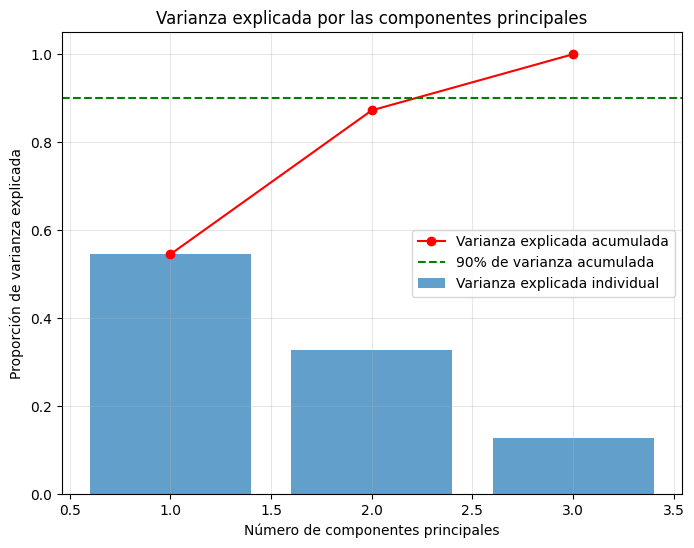

Componente 1: 0.5455 (0.5455 acumulado)
Componente 2: 0.3270 (0.8725 acumulado)
Componente 3: 0.1275 (1.0000 acumulado)


In [6]:
# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Varianza acumulada
explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# Visualización de la varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Varianza explicada individual')
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', color='red', label='Varianza explicada acumulada')
plt.title('Varianza explicada por las componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% de varianza acumulada')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Imprimir la varianza explicada
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Componente {i}: {ratio:.4f} ({explained_variance_cumulative[i-1]:.4f} acumulado)")


In [7]:
# Calcular las cargas de las variables originales en las componentes principales
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=columns_per
)
# Mostrar las cargas
display(loadings)


,PC1,PC2,PC3
per401,-0.618000,0.570116,-0.207471
per403,-0.068606,-0.207962,0.837881
per503,-0.091240,-0.713121,-0.482839
per504,0.777846,0.350968,-0.147571


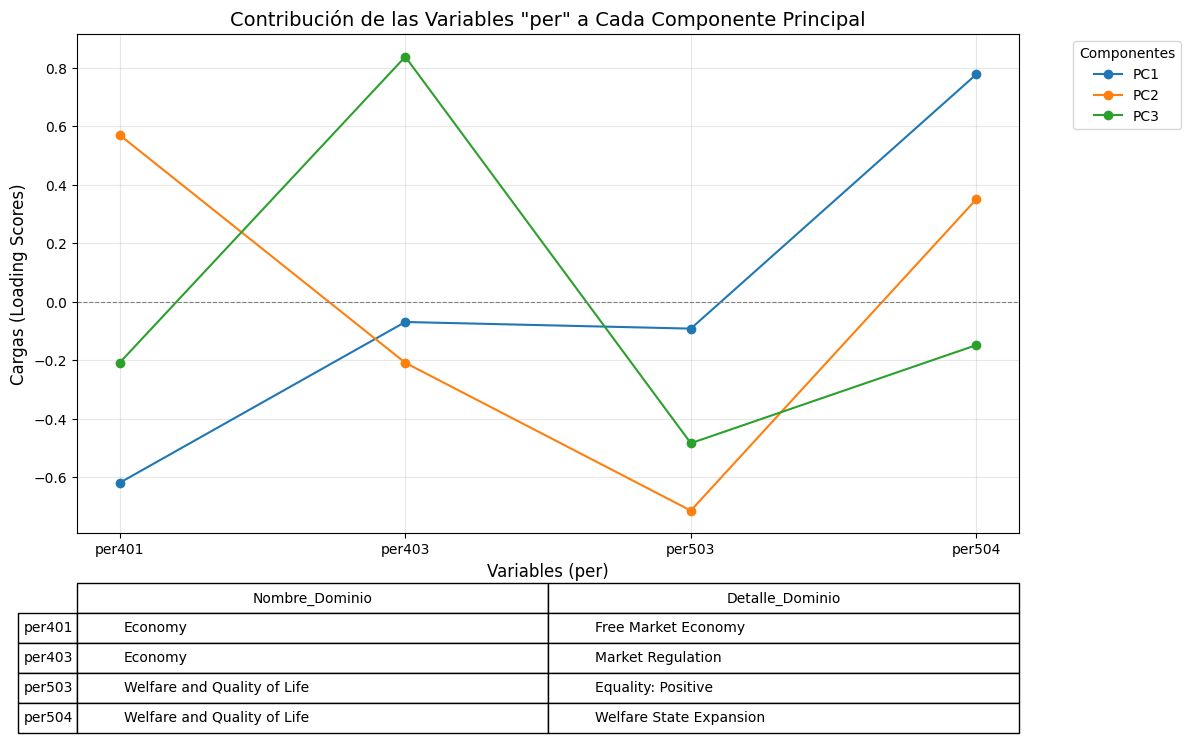

In [8]:
# Calcular las cargas (loading scores)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=columns_per
)

# Obtener información de las variables del aspecto desde df_AD
variables_info = df_AD[df_AD['Variable_per'].isin(columns_per)][['Variable_per', 'Nombre_Dominio', 'Detalle_Dominio']]
variables_info = variables_info.set_index('Variable_per').reindex(columns_per)

# Graficar las cargas para cada componente principal
fig, ax = plt.subplots(figsize=(12, 8))

for i, col in enumerate(loadings.columns):
    ax.plot(loadings.index, loadings[col], marker='o', label=col)

# Configuración del gráfico
ax.set_title('Contribución de las Variables "per" a Cada Componente Principal', fontsize=14)
ax.set_xlabel('Variables (per)', fontsize=12)
ax.set_ylabel('Cargas (Loading Scores)', fontsize=12)
ax.set_xticks(range(len(loadings.index)))
ax.set_xticklabels(loadings.index, rotation=0, ha='center')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.legend(title='Componentes', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(alpha=0.3)

# Crear la tabla con la información adicional
from matplotlib.table import Table

table_data = variables_info[['Nombre_Dominio', 'Detalle_Dominio']].values
table_col_labels = ['Nombre_Dominio', 'Detalle_Dominio']
table_row_labels = variables_info.index

# Agregar la tabla al gráfico
table = plt.table(cellText=table_data,
                  colLabels=table_col_labels,
                  rowLabels=table_row_labels,
                  cellLoc='left',
                  loc='bottom',
                  bbox=[0.0, -0.4, 1.0, 0.3])  # Ajustar posición y tamaño

# Ajustar diseño
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.0, 1.2)

plt.tight_layout()
plt.show()


#### 3.Elbow + K-MEANS
* Con K-MEANS vemos si es que los componentes principales forman clusteres
* Para saber el número óptimo de clusteres en un método de clasificación como K_MEANS, usamos el "elbow method". Este método:
* * Calcula los WCSS (Within-Cluster Sum of Squares): Mide la suma de las distancias cuadradas entre los puntos de datos y el centroide de su clúster.
* * Se calcula WCSS para diferentes números de clústeres (kk)
* * Al graficar kk contra WCSS, la curva normalmente muestra una pendiente pronunciada que luego se estabiliza.
* * El "codo" es el punto donde la reducción en WCSS deja de ser significativa, indicando que agregar más clústeres no mejora sustancialmente la compactación

/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

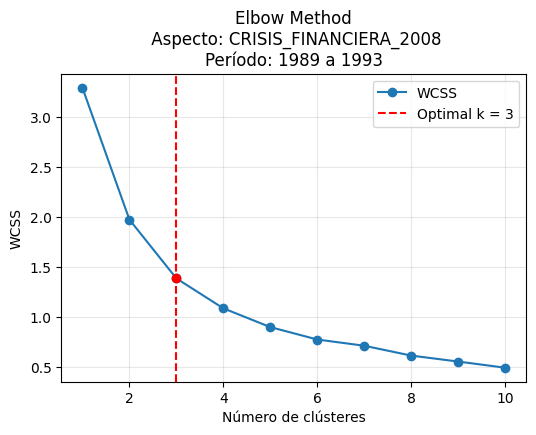

El número óptimo de clústeres (elbow method) es: 3


In [9]:
from kneed import KneeLocator

# Usar los datos normalizados de 'numeric_data' para calcular WCSS
data_scaled = numeric_data  # Asegúrate de que sea el conjunto de datos numéricos normalizados

# Calcular WCSS para determinar el número óptimo de clústeres
max_k = 10
wcss = []
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Encontrar el codo automáticamente
kl = KneeLocator(range(1, max_k + 1), wcss, curve="convex", direction="decreasing")
optimal_k = kl.knee

# Graficar el método del codo
plt.figure(figsize=(6, 4))
plt.plot(range(1, max_k + 1), wcss, marker='o', label="WCSS")
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.scatter(optimal_k, wcss[optimal_k - 1], color='red', zorder=5)  # Punto del codo
plt.title(f"Elbow Method\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"El número óptimo de clústeres (elbow method) es: {optimal_k}")


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


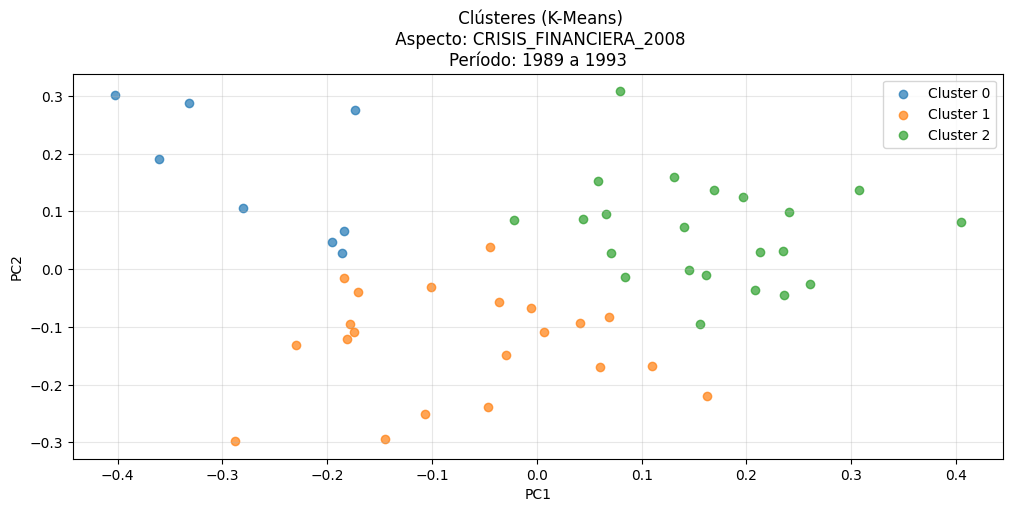

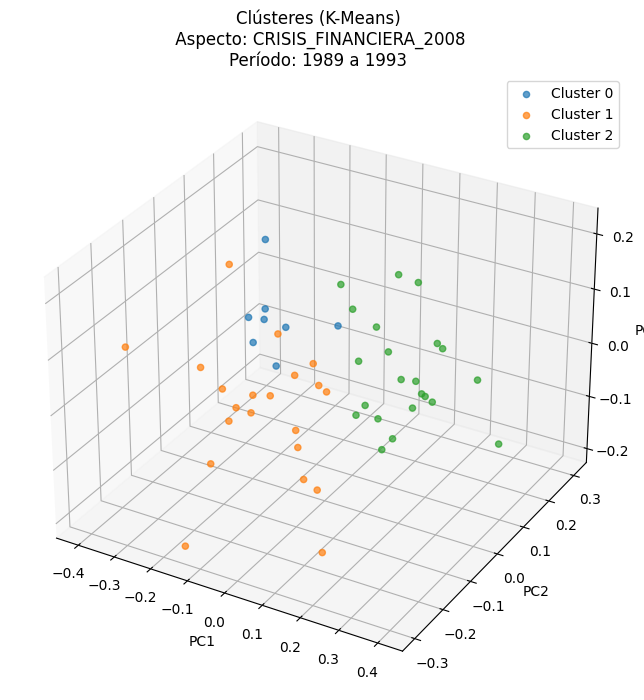

In [10]:
from mpl_toolkits.mplot3d import Axes3D
# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])

# Visualizar clústeres en 2D
plt.figure(figsize=(12, 5))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title(f" Clústeres (K-Means)\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Visualizar clústeres en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}', alpha=0.7)

ax.set_title(f"Clústeres (K-Means)\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()


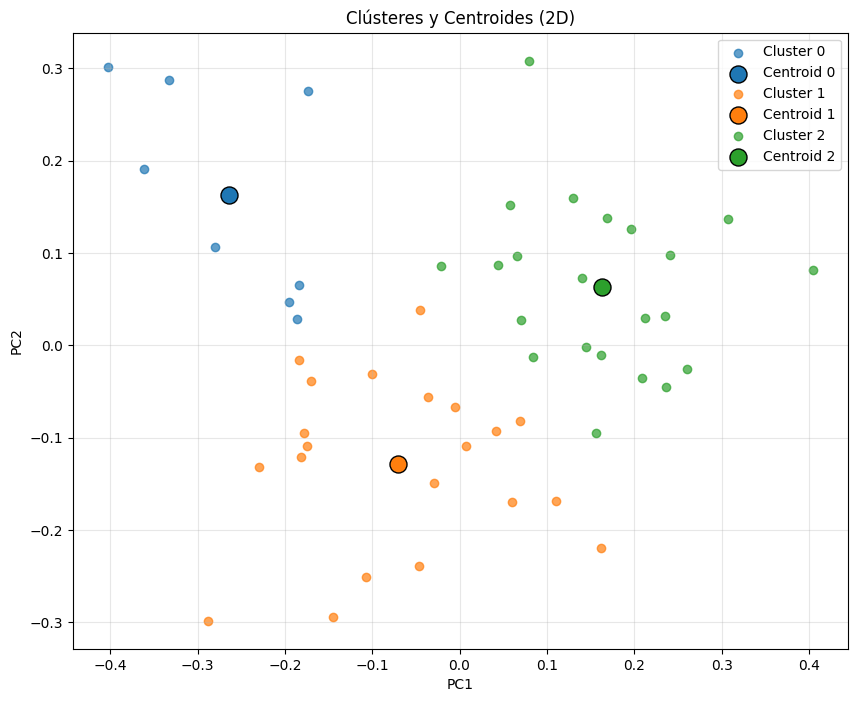

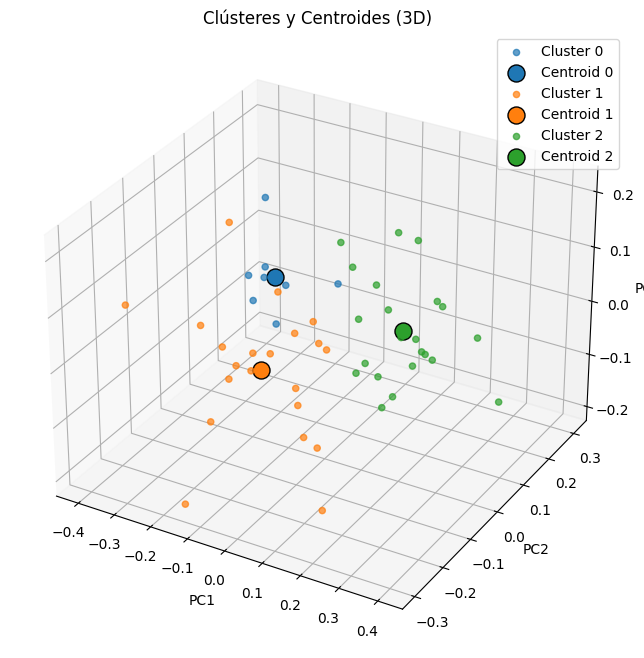

Coordenadas de los centroides:


,PC1,PC2,PC3
0,-0.264195,0.162541,-0.009313
1,-0.070037,-0.128581,-0.014214
2,0.162925,0.063631,0.016955


In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener los centroides del modelo K-Means
centroids = kmeans.cluster_centers_

# Crear un DataFrame para los centroides con las etiquetas de los componentes principales
centroids_df = pd.DataFrame(centroids, columns=['PC1', 'PC2', 'PC3'])

# Crear una paleta de colores para los clústeres
colors = plt.cm.tab10(range(optimal_k))

# Gráfico en 2D
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])
    
    # Añadir los centroides con el color correspondiente
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], color=colors[cluster], edgecolor='black', s=150, label=f'Centroid {cluster}')

plt.title('Clústeres y Centroides (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Gráfico en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])

    # Añadir los centroides con el color correspondiente
    ax.scatter(centroids[cluster, 0], centroids[cluster, 1], centroids[cluster, 2], color=colors[cluster], edgecolor='black', s=150, label=f'Centroid {cluster}')

ax.set_title('Clústeres y Centroides (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

# Mostrar las coordenadas de los centroides
print("Coordenadas de los centroides:")
display(centroids_df)


#### ANÁLISIS hasta aquí

### **1. Interpretación de las componentes principales (PCA):**
El **PCA** reduce las variables originales (`per401`, `per403`, `per503`, `per504` , etc.) a unas pocas **componentes principales** (`PC1`, `PC2`, `PC3`). Estas componentes son combinaciones lineales de las variables originales que explican la mayor parte de la varianza en los datos.

#### ¿Cómo interpretar las componentes principales?
- **Ejes de información:** 
  Cada componente principal representa una dimensión en la que los programas de gobierno tienen características similares o diferentes.
  
- **Contribución de las variables originales:**
  Usamos el gráfico de contribuciones (que ya generamos) para identificar qué variables (`per`) están contribuyendo más a cada componente:
  - Si `per401` contribuye mucho a `PC1`, entonces `PC1` captura diferencias entre programas en términos de esa variable.
  - Si `per403` contribuye mucho a `PC2`, entonces `PC2` captura diferencias relacionadas con esa otra variable.

#### Ejemplo de interpretación:
- **PC1**: Si `PC1` tiene una alta contribución de variables relacionadas con el gasto público (como `per401`), podríamos interpretar que los programas se diferencian en cómo abordan políticas de gasto.
- **PC2**: Si `PC2` está dominada por variables relacionadas con impuestos (como `per403`), esta dimensión podría estar asociada a enfoques sobre tributación.

---

### **2. Interpretación de los clústeres (K-Means):**
El **K-Means** agrupa programas de gobierno similares en función de las componentes principales (`PC1`, `PC2`, `PC3`).

#### ¿Qué significa estar en un mismo clúster?
- **Similitud:** Los programas dentro de un clúster tienen patrones comunes en las variables `per` del aspecto analizado.
  - Por ejemplo, un clúster podría agrupar programas que enfatizan políticas expansivas durante la crisis financiera.
- **Diferencias:** Los clústeres representan grupos que son distintos entre sí.
  - Si un clúster agrupa programas que enfatizan gasto público, otro podría enfocarse más en políticas de austeridad.

#### Cómo interpretar los gráficos:
- **2D o 3D:** Los puntos que están cerca en el gráfico representan programas más similares según las componentes principales.
- **Separación entre clústeres:** Si los clústeres están bien definidos (poca superposición), los programas de cada clúster tienen diferencias claras.

---

### **3. Pasos para interpretar los resultados:**

#### a) Explorar los países y períodos en cada clúster:
- ¿Qué países están en cada clúster?
- ¿Hay patrones regionales o temporales (por ejemplo, países europeos en un clúster y países latinoamericanos en otro)?

#### b) Revisar los centroides de los clústeres:
- Los centroides indican los "valores promedio" de las componentes principales para cada clúster.
- Comparar los centroides ayuda a entender cómo los clústeres son diferentes entre sí.

#### c) Relacionar clústeres con las variables originales:
- Usar las contribuciones de las variables a las componentes principales para interpretar las características de cada clúster.
  - Por ejemplo, si `PC1` captura gasto público y un clúster tiene un centroid alto en `PC1`, los programas en ese clúster probablemente priorizan el gasto público.

---

### **4. Ejemplo práctico:**
Supongamos que:
- **PC1** representa "políticas de gasto público".
- **PC2** representa "enfoques tributarios".
- Los gráficos de clústeres muestran que:
  - **Clúster 0** agrupa países europeos durante 2008-2010 con énfasis en austeridad.
  - **Clúster 1** incluye países latinoamericanos que adoptaron políticas expansivas.
  - **Clúster 2** contiene países asiáticos con un enfoque mixto.

Esto podría indicar que los programas de gobierno respondieron a la crisis financiera de manera distinta según el contexto regional.

---

### **¿Qué puedes hacer ahora?**
1. Analiza los países y períodos en cada clúster.
   - ¿Hay patrones regionales o temporales?
   - ¿Qué variables dominan los programas en cada clúster?
2. Relaciona los clústeres con eventos históricos.
   - Por ejemplo, ¿los programas en un clúster reflejan políticas recomendadas por organismos internacionales durante la crisis financiera?

¿Te gustaría que preparemos más celdas para facilitar este análisis? 😊

#### 4.Visualicemos qué países-programas hay en cada cluster

In [12]:
# Explorar los países y períodos en cada clúster
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Total Programas: {len(cluster_data)}")
    print("Países y años:")
    display(cluster_data)
    # for country, group in cluster_data.groupby('countryname'):
    #     years = group['agno'].tolist()
    #     print(f"- {country}: {len(years)} programas ({', '.join(map(str, years))})")



Cluster 0:
Total Programas: 8
Países y años:


,countryname,agno,PC1,PC2,PC3,cluster
5,Bosnia-Herzegovina,1990,-0.332263,0.287509,-0.093615,0
6,Bulgaria,1990,-0.280132,0.106068,-0.032500,0
14,Georgia,1990,-0.402332,0.300905,-0.076997,0
19,Hungary,1990,-0.360978,0.190400,-0.037414,0
34,North Macedonia,1990,-0.173439,0.275044,-0.055171,0
38,Romania,1992,-0.185629,0.028018,0.062897,0
39,Russia,1993,-0.195035,0.046737,0.198220,0
40,Serbia,1990,-0.183756,0.065648,-0.039925,0



Cluster 1:
Total Programas: 21
Países y años:


,countryname,agno,PC1,PC2,PC3,cluster
0,Argentina,1989,-0.177849,-0.094960,0.216092,1
3,Austria,1990,-0.183809,-0.015567,-0.057518,1
7,Canada,1993,-0.100734,-0.031327,0.078670,1
8,Chile,1989,-0.107178,-0.251064,-0.057735,1
9,Chile,1993,-0.229857,-0.132012,0.037729,1
13,France,1993,-0.036392,-0.056486,0.027143,1
18,Greece,1993,0.041573,-0.092883,0.080091,1
20,Iceland,1991,-0.046524,-0.239143,0.050635,1
22,Ireland,1992,0.060079,-0.169666,-0.032121,1
23,Israel,1992,-0.170519,-0.038916,-0.077058,1



Cluster 2:
Total Programas: 22
Países y años:


,countryname,agno,PC1,PC2,PC3,cluster
1,Australia,1990,0.169169,0.137239,-0.059824,2
2,Australia,1993,0.404304,0.080996,-0.074155,2
4,Belgium,1991,0.234886,0.031296,0.006964,2
10,Costa Rica,1990,0.155781,-0.094802,0.010721,2
11,Denmark,1990,0.196751,0.125505,-0.059414,2
12,Finland,1991,0.058089,0.151789,-0.005114,2
15,Germany,1990,0.084469,-0.013194,0.150388,2
16,Greece,1989,0.212783,0.029471,-0.022633,2
17,Greece,1990,0.236147,-0.045577,0.068401,2
21,Ireland,1989,0.260158,-0.026044,0.061081,2


#### 5. 